# Lab4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score as dbs

## Class DPC

In [2]:
class DPC(object):

    def __init__(self, threshold=5,rho=None,delta=None,distance_matrix=None,center=np.array([]),classify_num=0,label=None,norm_type="l2"):
        """

        :param threshold: 阈值d_c
        :param rho: rho向量
        :param delta: delta向量
        :param distance_matrix: 距离矩阵
        :param center:  中心点
        :param classify_num: 类别数
        :param label: 类别向量
        :param norm_type: 范数类型（可选l1或l2）
        """
        self.threshold=threshold
        self.rho=rho
        self.delta=delta
        self.norm_type=norm_type
        self.center=center
        self.classify_num=classify_num
        self.distance_matrix=distance_matrix
        self.label=label

    def distance(self,x,y):
        if self.norm_type=="l1":
            return sum(abs(x-y))
        if self.norm_type=="l2":
            return np.dot(x-y,x-y)**0.5

    def make_graph(self,X):
        #基于数据集X生成决策图、rho,delta等
        n=X[:,0].size
        rho=np.zeros(n)
        delta=np.zeros(n)
        distance_matrix=np.zeros(shape=(n,n))
        for i in range(n):
            for j in range(i):
                d=self.distance(X[i,:],X[j,:])
                distance_matrix[i][j]=d
                distance_matrix[j][i]=d
        for i in range(n):
            rho[i]=np.where(distance_matrix[i,:]<self.threshold)[0].size
        for i in range(n):
            ind=np.where(rho>rho[i])[0]
            if ind.size !=0:
                delta[i]=min(distance_matrix[i,ind])
        max_rho_index=np.where(rho==max(rho))[0]
        for i in max_rho_index:
            delta[i] = max(distance_matrix[i])
        self.rho=rho
        self.delta=delta
        self.distance_matrix = distance_matrix
        self.label = -np.ones(n)
        plt.title("Decision Graph")
        plt.xlabel("rho")
        plt.ylabel("delta")
        plt.scatter(rho,delta)

    def find_center_point(self,num=8):
        #选择rho*gamma前num最大者
        gamma=self.delta*self.rho
        argsort_gamma =np.argsort(gamma)
        e= argsort_gamma[::-1]
        center=e[:num]
        self.center=center
        self.classify_num=num
        return center

    def find_center_point2(self, rho_rate, delta_rate):
        #选择$\rho\text{和}\delta$在不小于指定值的下标作为中心点。
        n=self.rho.size
        rho_threshold = rho_rate * (max(self.rho) - min(self.rho)) + min(self.rho)
        delta_threshold = delta_rate * (max(self.delta) - min(self.delta)) + min(self.delta)
        for i in range(n):
            if self.rho[i] >= rho_threshold and self.delta[i] >= delta_threshold:
                self.center=np.append(self.center,i)
        self.classify_num=self.center.size

    def find_neighbor(self,k):
        ind=np.where(self.rho>self.rho[k])[0]
        # if ind.size !=0:
        min_index=ind[0]
        min_value=self.distance_matrix[k][min_index]
        for i in ind:
            if self.distance_matrix[k][i]<min_value:
                min_value= self.distance_matrix[k][i]
                min_index=i
        return min_index


    def get_label(self,k):
        #递归实现加标签
        if self.label[k] != -1:
            return self.label[k]
        else:
            self.label[k] = self.get_label(self.find_neighbor(k))
            return self.label[k]

    def classify(self,X):
        #分类
        n=X[:,0].size
        for i in range(self.classify_num):
            self.label[int(self.center[i])] = i
        for i in range(n):
            if self.label[i] != -1 :
                continue
            else:
                self.get_label(i)

    def DBI(self,X):
        score=dbs(X,self.label)
        return score


## Aggregation data

In [3]:
df=pd.read_table("Aggregation.txt",header=None,sep=' ')
data=np.array(df)
# plt.scatter(data[:,0],data[:,1])

中心点： [768 340 602  47 721 191 254 553 552]
DBI= 0.8733462606576252


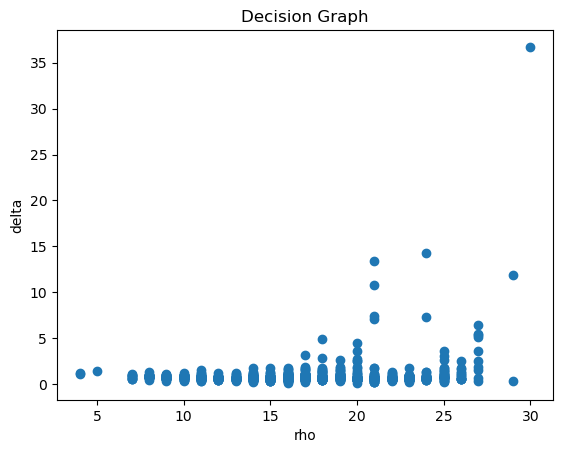

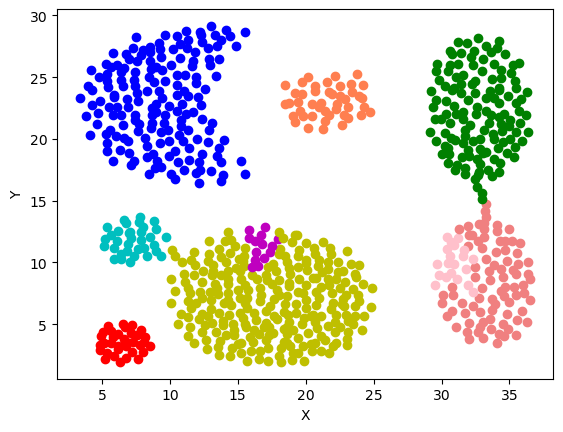

In [4]:
n= data[:,0].size
model1=DPC(threshold=1.86,norm_type="l2")
model1.make_graph(data)
center=model1.find_center_point(num=9)
print("中心点：",center)
model1.classify(data)
print("DBI=",model1.DBI(data))
fig = plt.figure()
# 设置每个样本点的颜色（用于聚类结果展示）
colors = ['r','y','g','b','coral','c','m','pink','lightcoral','magenta','orchid','deepskyblue','skyblue','teal','lawngreen','yellow','sandybrown','crimson','wheat','greenyellow','dodgerblue','linen','peachpuff','cyan','tomato','violet','silver','r','pink','blue','white']
plt.xlabel('X')
plt.ylabel('Y')

for i in range(n):
    plt.scatter(data[i,0], data[i,1], c=colors[int(model1.label[i])], marker='o')
plt.show()


## D31

In [5]:
df2=pd.read_table("D31.txt",header=None,sep=' ')
data2=np.array(df2)

中心点： [ 179.  512.  547.  588.  675.  895.  925. 1153. 1270. 1381. 1444. 1532.
 1568. 1593. 1830. 1933. 2069. 2098. 2111. 2240. 2324. 2330. 2343. 2428.
 2530. 2675. 2740. 2804. 2828. 2972.]
中心点数目： 30
DBI= 0.7788822311065383


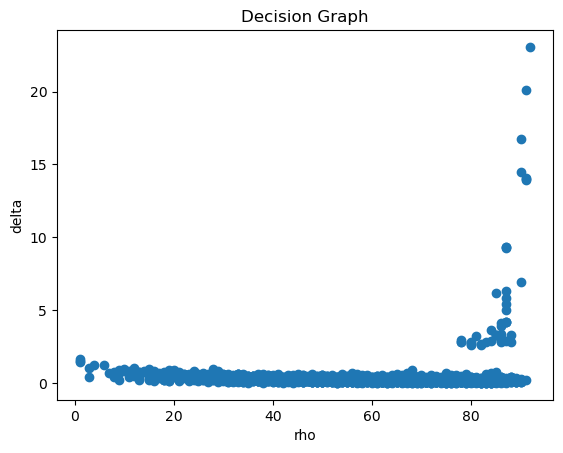

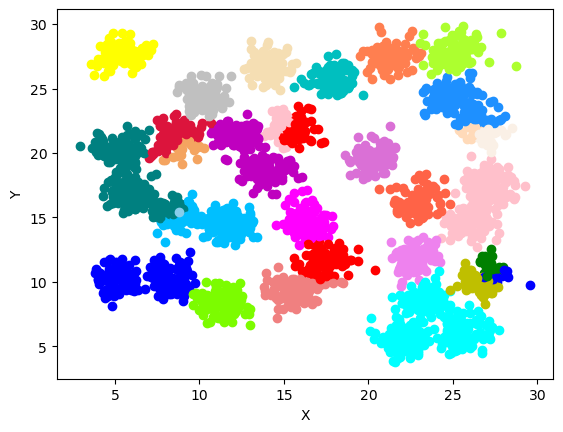

In [6]:
n= data2[:,0].size
model2=DPC(threshold=1.43,norm_type="l2")
model2.make_graph(data2)
# model2.find_center_point(num=15)

model2.find_center_point2(rho_rate=0.6,delta_rate=0.13)
center2=model2.center
print("中心点：",center2)
print("中心点数目：",model2.classify_num)
model2.classify(data2)
print("DBI=",model2.DBI(data2))

fig = plt.figure()
# 设置每个样本点的颜色（用于聚类结果展示）
colors = ['r','y','g','b','coral','c','m','pink','lightcoral','magenta','orchid','deepskyblue','skyblue','teal','lawngreen','yellow','sandybrown','crimson','wheat','greenyellow','dodgerblue','linen','peachpuff','cyan','tomato','violet','silver','r','pink','blue','white','cyan','royalblue','maroon','chocolate','sage']
plt.xlabel('X')
plt.ylabel('Y')

for i in range(n):
    plt.scatter(data2[i,0], data2[i,1], c=colors[int(model2.label[i])], marker='o')
plt.show()

## R15

In [7]:
df3=pd.read_table("R15.txt",header=None,sep=' ')
data3=np.array(df3)

中心点： [179 344 368 517 496 432 478 521 463 594 279 108 210 299  17  38  72]
中心点数目： 17
DBI= 0.6326347611755493


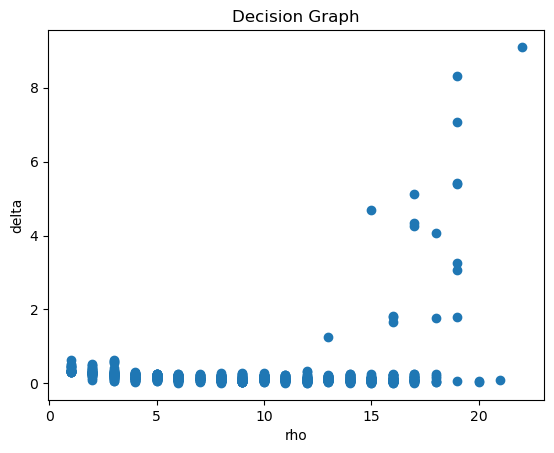

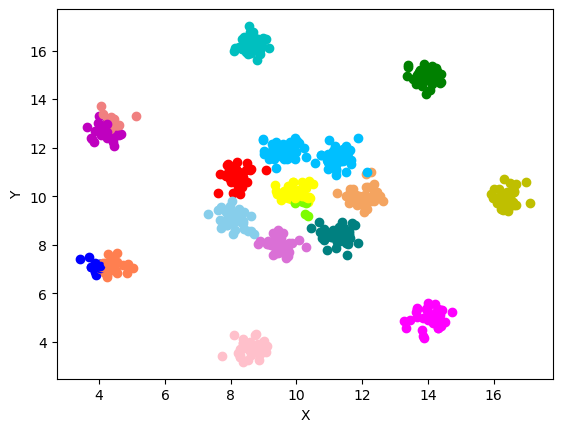

In [8]:
n= data3[:,0].size
model3=DPC(threshold=0.30,norm_type="l2")
model3.make_graph(data3)
model3.find_center_point(num=17)

# model3.find_center_point2(rho_rate=0.68,delta_rate=0.13)
center2=model3.center
print("中心点：",center2)
print("中心点数目：",model3.classify_num)
model3.classify(data3)
print("DBI=",model3.DBI(data3))

fig = plt.figure()
# 设置每个样本点的颜色（用于聚类结果展示）
colors = ['r','y','g','b','coral','c','m','pink','lightcoral','magenta','orchid','deepskyblue','skyblue','teal','lawngreen','yellow','sandybrown','crimson','wheat','greenyellow','dodgerblue','linen','peachpuff','cyan','tomato','violet','silver','white','cyan','royalblue','maroon','chocolate','sage','r','pink','blue']
plt.xlabel('X')
plt.ylabel('Y')

for i in range(n):
    plt.scatter(data3[i,0], data3[i,1], c=colors[int(model3.label[i])], marker='o')
plt.show()

## hyper-parameters comparation

th= 0.5
DBI= 0.850401041996351
****************************************
th= 0.7777777777777778
DBI= 0.9564145515382958
****************************************
th= 1.0555555555555556
DBI= 0.7231233674754329
****************************************
th= 1.3333333333333335
DBI= 0.7778195772217262
****************************************
th= 1.6111111111111112
DBI= 0.8832810065780249
****************************************
th= 1.8888888888888888
DBI= 2.9902846503960814
****************************************
th= 2.166666666666667
DBI= 0.7950195101691747
****************************************
th= 2.4444444444444446
DBI= 0.8698159684137872
****************************************
th= 2.7222222222222223
DBI= 0.8137358689694765
****************************************
th= 3.0
DBI= 0.8364855619865792
****************************************


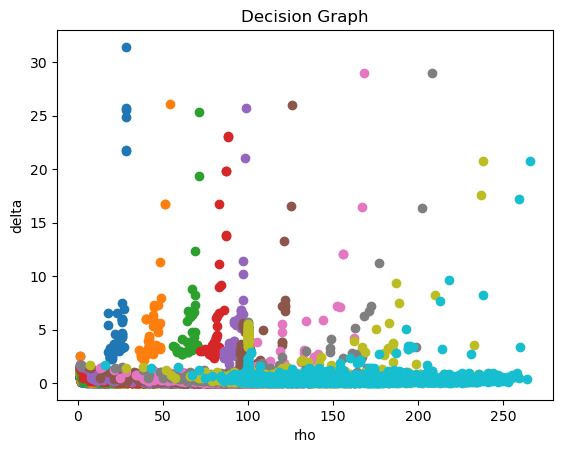

In [9]:
#为简洁起见，删去了部分超参数选择过程，仅列出部分
for th in np.linspace(0.5,3,10):
    model2=DPC(threshold=th,norm_type="l2")
    model2.make_graph(data2)
    # model2.find_center_point(num=15)

    model2.find_center_point2(rho_rate=0.6,delta_rate=0.15)
    center2=model2.center
    print("th=",th)
    # print("中心点：",center2)
    # print("中心点数目：",model2.classify_num)
    model2.classify(data2)
    print("DBI=",model2.DBI(data2))
    print("****************************************")